![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [5]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


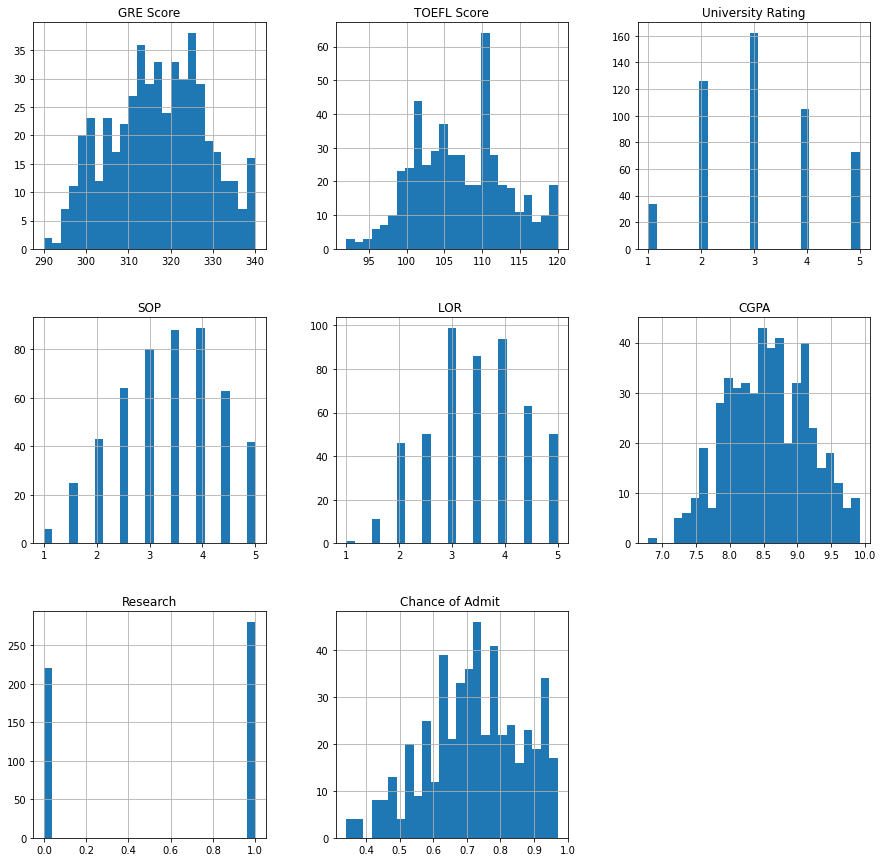

In [6]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [7]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [8]:
Y = pd.DataFrame(data, columns=["Chance of Admit "])

In [9]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [10]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

### Definición de variables predictoras y de interés

In [12]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [13]:
# Definición de dimensiones de salida, variables de interés
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [14]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


### Red Neuronal de una capa

In [15]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

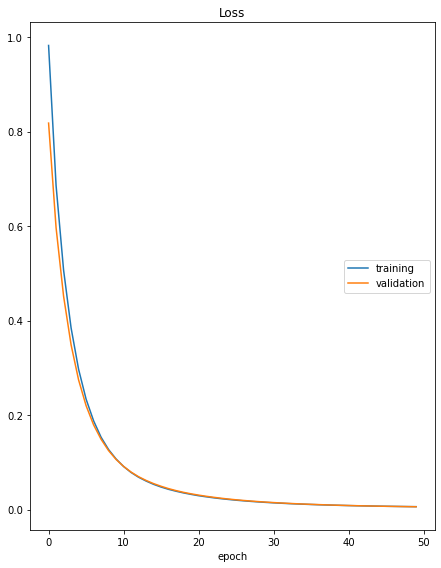

Loss
	training         	 (min:    0.006, max:    0.983, cur:    0.006)
	validation       	 (min:    0.006, max:    0.818, cur:    0.006)


In [17]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [18]:
#Evaluación del modelo
res_una_capa = model.evaluate(X_test,Y_test, verbose = 0)

In [19]:
print("El test loss de una capa es: ",res_una_capa)

El test loss de una capa es:  0.0058907256461679935


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)
mae_1capa = mean_absolute_error(Y_test, y_pred)
mse_1capa = mean_squared_error(Y_test, y_pred)
print("El MAE de una capa es: ",mae_1capa)
print("El MSE de una capa es: ",mse_1capa)

El MAE de una capa es:  0.058862838403383896
El MSE de una capa es:  0.005890725760464452


Realizando el procedimiento de redes neuronales de una sola capa, el resultado del test loss es de 0.005890, teniendo en cuenta que la red neuronal es de 50 épocas. Se esperaría que aumentando las capas e incluyendo procesos como earlystop y dropout se tenga un test loss menos, sin embargo esta hipótesis se evaluará en los siguientes puntos.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [20]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model_2 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2.add(Dense(280, input_shape=(dims,),activation='relu'))
model_2.add(Dense(256,activation='relu'))
model_2.add(Dense(256,activation='relu'))
model_2.add(Dense(output_var))
model_2.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 280)               2240      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               71936     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 140,225
Trainable params: 140,225
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2.compile(optimizer='sgd', loss='mean_squared_error')

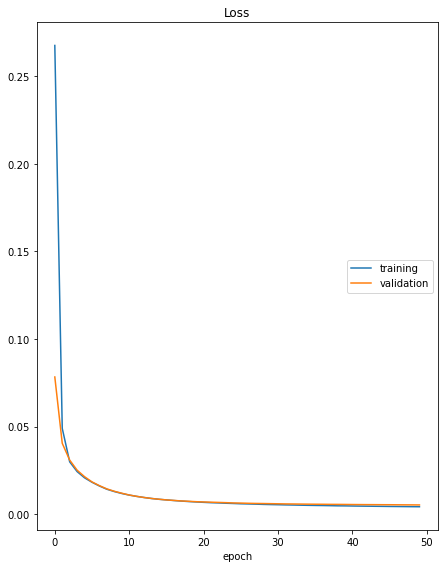

Loss
	training         	 (min:    0.004, max:    0.268, cur:    0.004)
	validation       	 (min:    0.005, max:    0.078, cur:    0.005)


In [22]:
model_2.fit(X_train, Y_train, 
          verbose=2, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [23]:
res_dos_capa = model_2.evaluate(X_test,Y_test, verbose = 0)

In [24]:
print("El test loss de dos capas es: ",res_dos_capa)

El test loss de dos capas es:  0.005332618951797485


In [46]:
y_pred = model_2.predict(X_test)
mae_2capa = mean_absolute_error(Y_test, y_pred)
mse_2capa = mean_squared_error(Y_test, y_pred)
print("El MAE de dos capas es: ",mae_2capa)
print("El MSE de dos capas es: ",mse_2capa)

El MAE de dos capas es:  0.05751042569478353
El MSE de dos capas es:  0.00533261876912924


Realizando el proceso de redes neuronales de 2 capas se encontró que el test loss es de 0.005332. Este resultado se obtuvo teniendo en cuenta que en la capa del input se manejaron 280 neuronas y en el resto de las capas 256 neuronas, estos datos se colocaron después de evaluar el modelo cn distintos números de neuronas teniendo en cuenta que se quería minimizar el test loss. 
La hipótesis del primer punto se cumplió con el proceso de 2 capas y se espera que el proceso multicapa y con early stopp y dropout tendrá un mejor resultado.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [34]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model_multi = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_multi.add(Dense(256, input_shape=(dims,),activation='relu'))
model_multi.add(Dense(256,activation='relu'))
model_multi.add(Dropout(0.1))
model_multi.add(Dense(256,activation='relu'))
model_multi.add(Dense(256,activation='relu'))
model_multi.add(Dropout(0.1))
model_multi.add(Dense(256,activation='relu'))
model_multi.add(Dense(output_var))
model_multi.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_multi.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6

In [35]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_multi.compile(optimizer='sgd', loss='mean_squared_error')

In [36]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [37]:
fBestModel = "best_model.h5"
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [38]:
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

In [39]:
model_multi.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50,
          callbacks=[best_model, early_stop])

Epoch 1/50
8/8 [==============================] - 1s 24ms/step - loss: 0.3163 - val_loss: 0.1584
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.1088 - val_loss: 0.0566
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0386 - val_loss: 0.0304
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0216 - val_loss: 0.0237
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0194 - val_loss: 0.0212
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0178 - val_loss: 0.0195
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0157 - val_loss: 0.0181
Epoch 8/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0153 - val_loss: 0.0171
Epoch 9/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0141 - val_loss: 0.0161
Epoch 10/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0138 - val_loss: 0.0154
Epoch 11/50
8/8 [====================

In [40]:
res_multi_capa = model_multi.evaluate(X_test,Y_test, verbose = 0)

In [41]:
print("El test loss multicapa y utilizando earlystop y dropout es: ",res_multi_capa)

El test loss multicapa y utilizando earlystop y dropout es:  0.004779207054525614


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model_multi.predict(X_test)
mae_multi = mean_absolute_error(Y_test, y_pred)
mse_multi = mean_squared_error(Y_test, y_pred)
print("El MAE de multicapa es: ",mae_multi)
print("El MSE de multicapa es: ",mse_multi)

El MAE de multicapa es:  0.05427317007382711
El MSE de multicapa es:  0.004779206477444967


El test loss dado el proceso multicapa de redes neuronales fue de 0.004779. Este resultado se dio después de varios intentos en donde el objetivo era minimizar el test loss, encontrando que con un modelo de 4 capas con 256 neuronas cada uno y con dos steps de dropout del 10% para disminuir la varianza se reducía el test. Cabe mencionar que el earlystop en este caso no impactó el resultado. 
Después de revisar los 3 procedimientos se confirmó la teoría del primer punto

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

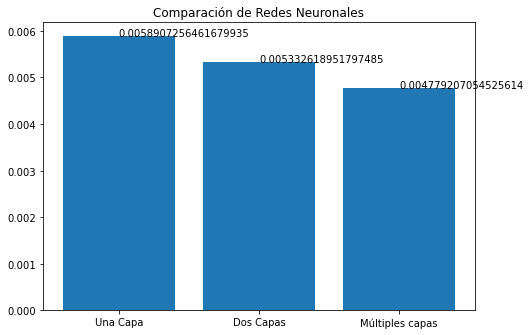

In [43]:
# Celda 4
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de Redes Neuronales")
ejeX = ['Una Capa','Dos Capas' ,'Múltiples capas']
ejeY = [res_una_capa,res_dos_capa,res_multi_capa]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.ylim(0)
plt.show()

Revisando el test loss de cada uno de los modelos de redes neuronales, se evidencia que el que contiene mùltiples capas es el mejor modelo de redes ya que minimiza el resultado de pérdida. En este caso se puede concluir que adicionar multiples capas y adicionar el dropout para disminuir la varianza permitió tener un mejor resultado.

Este resultado obtenido se da porque el dataset lo permite, nos explicamos, si un dataset cuenta con una variable dependiente a la cual no se le pueda aplicar una transformación líneal, agregar capas no generá mucho valor agregado y en los resultados se podrá observar, en ocasiones, como los modelos de una capa podrán ser mejores.

La idea y, el exito del modelo multicapa, se ve reducido a lo mencionado en puntos anteriores, jugar con los componentes del mismo ya que si hablamos de redes neuronales, no existe una receta a seguir y cada problema es diferente, la compbinación de desnse, dropout y early stopping no necesariamente será la mejor para otro prolema.

Ahora bien, respecto las ventajas y desventajas, el modelo multicapa gracias al early stopping nos va a reducir un poco el gasto computacional ya que si en dos (2) epocas encuentra lo mismo, va a aparar ahí. El modleo multicapa cuenta con otra gran ventaja y es que gracias al dropout que puede ser considerado como una técnica de regularización evitamos que nuestro modelo tenga sobre ajuste.